## Семинар 8
# Тема: Работа с пропусками: удаление и одномерные способы импутации (замещения) признаков

Большинство моделей машинного обучения не могут работать с данными (признаками и целью), имеющими пропущенные значения.
Поэтому игнорировать пропущенные значения в данных нельзя.

Существует две стратегии работы с пропусками: удаление и заполнение. У обоих подходов есть свои достоинства и недостатки.

Выделяют три типа пропущенных значений в данных:
    
 ♦ Пропущены совершенно случайно (**MCAR**, Missing Completely At Random).
Вероятность того, что значение пропущено, ни от чего не зависит. Например,  участник викторины, прежде чем ответить на вопрос, бросает кубик: если выпадает шесть, то он пропускает этот вопрос.

 ♦ Пропущены случайно (**MAR**, Missing At Random). 
Вероятность того, что значение пропущено, не является полностью случайной, но зависит от информации,
зафиксированной в других признаках. Например, в опросе общественного мнения наряду с другими вопросами ставятся вопросы о годовой заработной плате и об образовании и клиенты с низким уровнем образования чаще, чем другие респонденты, не отвечают на вопрос о заработной плате.

♦ Пропущены не случайно (**MNAR** Missing Not At Random) – тип пропущенных данных, когда пропуск значения не является случайным, но не может быть объяснен другими признаками в наборе.
Пропущенные значения зависимы от неизвестных нам факторов, здесь
необходимо провести дополнительные исследования. В качестве примера, можно привести
вышеописанный случай с пропусками в признаке Заработная плата, но только теперь
признак Образование у нас отсутствует.


***Способы борьбы с пропущенными значениями:***
#### Удалить строки с отсутствующими значениями


   Самым простым решением является удаление каждого наблюдения, содержащего одно или несколько пропущенных значений: 
   
  `df.dropna()`
  
   Необходимо всячески воздерживаться от удаления наблюдений с отсутствующими значениями. Их удаление является крайним средством, поскольку алгоритм теряет доступ к полезной информации, содержащейся в непропущенных значениях наблюдения. 
   Иногда допустимо удалять наблюдения, если они пропущены совершенно случайно(MCAR) или просто случайно (MAR). Однако если значение пропущено не случайно (MNAR), то факт, что значение пропущено, сам по себе является информацией. Удаление наблюдений MNAR может привнести в данные смещение, потому что мы удаляем наблюдения, порожденные некоторым ненаблюдаемым систематическим эффектом.
#### Одномерные способы импутации (замещения) пропусков
Одномерные способы импутации пропусков - это замещение пропусков в каждом признаке, используя данные только этого признака, т.е. замещением статистиками по признакам.
1. Количественные признаки

Пропуски в количественных признаках заменяются вычисленными статистиками, обычно используется среднее или медиана. В случае данных, имеющих асимметричное распределение, предпочитают использовать медиану,
а не среднее, так как на нее не влияет небольшое число наблюдений c очень большими или очень маленькими значениями.

`df['Признак'].fillna(df['Признак'].mean(), inplace = True)`

`df['Признак'].fillna(df['Признак'].median(), inplace = True)`

`df['Признак'].fillna(df['Признак'].max(), inplace = True)`

`df['Признак'].fillna(df['Признак'].min(), inplace = True)`

2. Категориальные признаки

Пропуски в категориальных признаках можно заменить самой часто встречающейся категорией – модой.
Обратите внимание: мод может быть несколько, и в программном коде вы должны указать, какую моду хотите использовать.

`df['Признак'].fillna(df['Признак'].value_counts().index[0], inplace = True)`

`df['Признак'].fillna(df['Признак'].value_counts().index[1], inplace = True)`

Импутацию средним, медианой и прочими статистиками для количественных признаков и модой для категориальных необходимо выполнять **после разбиения** набора данных на обучающую и тестовую выборки при hold-out разбиении или при многократном разбиении внутри цикла перекрестной проверки.

Замечание: Часто пропуски у бинарных признаков замещают не на статистики, а привращают каждый бинарный признак в тринарный. Бинарные признаки, у которых есть пропуски, можно превратить в тринарные, где первую категорию можно закодировать как –1, вторую категорию – как 1, а пропуски – как 0. Данный способ импутации нужно применять до разбиения на обучение и тест.

Можно использовать класс `SimpleImputer` из `Sklearn.impute` для замены отсутствующих значений как для числовых (numerical), так и для категориальных (categorical) признаков.
Для числовых пропущенных значений можно использовать такие стратегии, как `mean`, `median`, `most_frequent` и `constant`.
Для категориальных признаков можно использовать такие стратегии, как `most_frequent` и `constant`.

Загружаем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

### 1. Загрузите датасет `Titanic.csv` и выведите первые 5 строк. Вывидете информацию об этом датафрейме и его размеры. 

In [2]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

### 2. Выведите количество пропущенных значений в каждом столбце. Визуализируйте эту информацию.

In [4]:
missing = df.isna().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

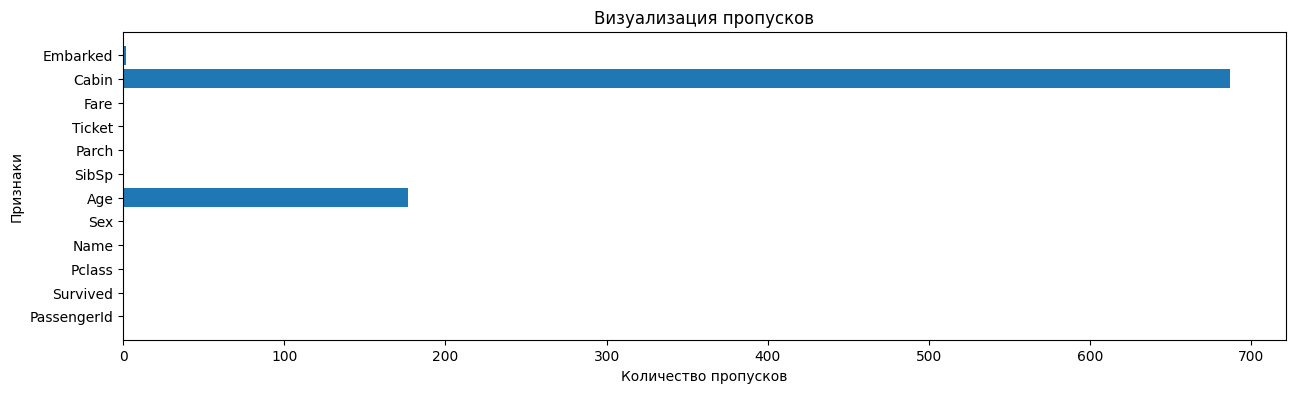

In [5]:
fig = plt.figure(figsize=(15, 4))
plt.barh(df.columns, missing.values)

plt.title("Визуализация пропусков")
plt.xlabel("Количество пропусков")
plt.ylabel("Признаки")
plt.show()

### 3. Cделайте копию датасета и удалите в ней с помощью метода .dropna() все строки с пропусками. Выведите размер полученного датафрейма. Сделайте вывод о том, можно ли было удалять все строки с пропусками.

In [6]:
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
df_copy.shape

(183, 12)

### 4. Удалите в исходном датафрейме столбец с очень большим количеством пропучков `Cabin`.

In [8]:
df = df.drop("Cabin", axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### 5. Постройте гистограмму распределения признака  `Age`.  Выведите среднее арифметическое и медиану по признаку `Age`.

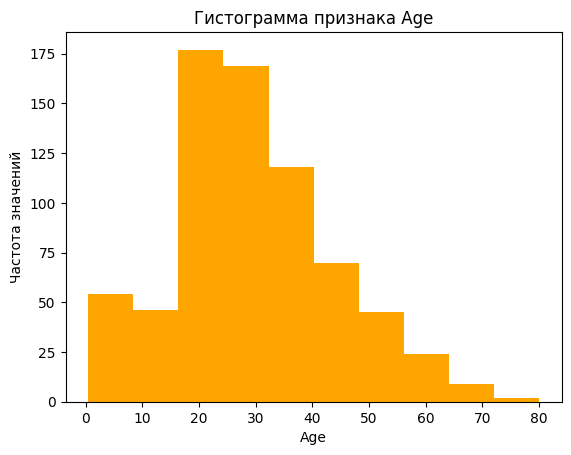

In [9]:
plt.hist(df['Age'], color='orange')
plt.title("Гистограмма признака Age")
plt.xlabel("Age")
plt.ylabel("Частота значений")
plt.show()

In [10]:
df["Age"].mean(), df["Age"].median()

(np.float64(29.69911764705882), np.float64(28.0))

###  6. Заполните пропуски в признаке `Age` медианным значением с помощью метода .fillna().  И снова постройте гистограмму распределения этого признака. Выведите среднее арифметическое и медиану по признаку `Age` после заполнения.

In [11]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

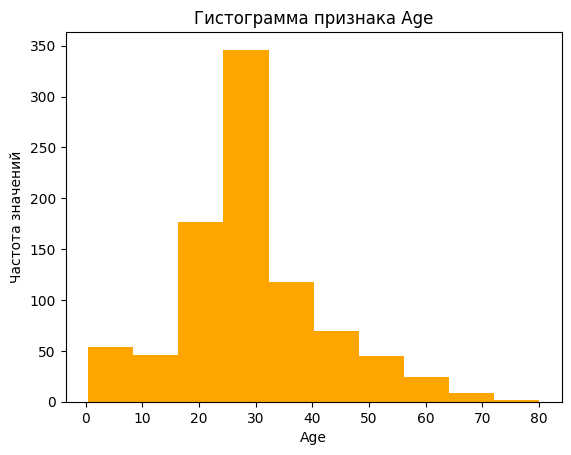

In [12]:
plt.hist(df['Age'], color='orange')
plt.title("Гистограмма признака Age")
plt.xlabel("Age")
plt.ylabel("Частота значений")
plt.show()

In [13]:
df["Age"].mean(), df["Age"].median()

(np.float64(29.36158249158249), np.float64(28.0))

### 7. Теперь категориальный признак `Embarked` с пропусками замените модой. Убедитесь, что пропусков больше нет.

In [14]:
df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [15]:
moda = df['Embarked'].value_counts(dropna=False).index[0]
moda

'S'

In [16]:
df["Embarked"] = df["Embarked"].fillna(moda)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 8. Заполните пропуски в признаках `Age` медианным значением и модой в Embarked с помощью SimpleImputer. С помощью атрибута statistics_ выведите соответствующие значения статисик. Убедитесь, что значения в признаках будут те же, что и при использовании .fillna().

In [17]:
df1 = pd.read_csv("Titanic.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
imp_numerical = SimpleImputer(missing_values=np.nan, strategy='median')

imp_numerical.fit(df1[["Age"]])

SimpleImputer(strategy='median')

In [19]:
df1[["Age"]] = imp_numerical.transform(df1[["Age"]])

In [20]:
df1["Age"].isna().sum()

np.int64(0)

In [21]:
imp_numerical.statistics_

array([28.])

In [22]:
df1["Age"].median()

np.float64(28.0)

In [23]:
imp_categorial = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp_categorial.fit(df1[["Embarked"]])

SimpleImputer(strategy='most_frequent')

In [24]:
df1[["Embarked"]] = imp_categorial.transform(df1[["Embarked"]])
df1[["Embarked"]].isna().sum()

Embarked    0
dtype: int64

In [25]:
imp_categorial.statistics_

array(['S'], dtype=object)

In [26]:
df1[["Embarked"]].value_counts(dropna=False)

Embarked
S           646
C           168
Q            77
Name: count, dtype: int64

## Задания для самостоятельного выполнения
1. Загрузите датасет `Titanic.csv` и выведите информацию о нём.
2. Замените значения в признаке 'Sex' в соответствии со словарём {'male': 1, 'female': 0}. А остальные признаки типа object удалите. Снова выведите информацию о данных.
3. Отдедите целевую переменную 'Survived' и обозначьте данные за `X`, а целевую переменную за `y`. Выведите их размеры.
4. Сделайте hold-out разбиение данных на два набора, взяв в тестовый набор 30% данных и указав random_state=100. Выведите их размеры.
5. Выведите количество пропущенных значений в X и в X_train.
6. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_train на среднее значение. Убедитесь, что пропусков больше нет. Выведите среднее значение признака `Age` у данных X_train с помощью атрибута `statistics_`, а так же при помощи  метода `.mean()`. Убедитесь, что результаты получатся одинаковые.
7. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_test. Выведите среднее значение признака `Age` у данных X_test.
8. Обучите модель логистической регрессии на обучающих данных. Сделайте предсказание для лучшей модели на тестовом наборе данных и оцените качество модели с использованием метрик `accuracy` и `f1`.
9. Терерь вместо hold-out разбиения сделайте 3-блочную перекрёстную проверку для той же модели при помощи функции `cross_validate`, выполняя заполнение пропусков при помощи SimpleImputer внутри перекрёстной проверки, используя Pipeline. 
10. Выведите средние значения метрик `accuracy` и `f1`

1. Загрузите датасет `Titanic.csv` и выведите информацию о нём.

In [27]:
df2 = pd.read_csv("Titanic.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Замените значения в признаке 'Sex' в соответствии со словарём {'male': 1, 'female': 0}. А остальные признаки типа object удалите. Снова выведите информацию о данных.

In [28]:
df2['Sex'] = df2["Sex"].map({'male': 1, 'female': 0})
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [29]:
df2 = df2.select_dtypes(exclude='object')

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [31]:
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

3. Отдедите целевую переменную 'Survived' и обозначьте данные за `X`, а целевую переменную за `y`. Выведите их размеры.

In [32]:
y = df2['Survived'].values
X = df2.drop('Survived', axis=1).values
X.shape, y.shape

((891, 7), (891,))

4. Сделайте hold-out разбиение данных на два набора, взяв в тестовый набор 30% данных и указав random_state=100. Выведите их размеры.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

y_train.shape, y_test.shape

((623,), (268,))

5. Выведите количество пропущенных значений в X и в X_train.

In [34]:
np.isnan(X).sum()

np.int64(177)

In [35]:
np.isnan(X_train).sum()

np.int64(128)

6. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_train на среднее значение. Убедитесь, что пропусков больше нет. Выведите среднее значение признака `Age` у данных X_train с помощью атрибута `statistics_`, а так же при помощи  метода `.mean()`. Убедитесь, что результаты получатся одинаковые.

In [36]:
age_index = list(df.columns).index('Age')
age_index

5

In [37]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(X_train[:, age_index].reshape(-1, 1))

SimpleImputer()

In [38]:
X_train[:, age_index] = imp.transform(X_train[:, age_index].reshape(-1, 1)).ravel()

np.isnan(X_train).sum()

np.int64(128)

In [39]:
imp.statistics_

array([0.37078652])

In [40]:
X_train[:,age_index].mean()

np.float64(0.3707865168539326)

7. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_test. Выведите среднее значение признака `Age` у данных X_test.

In [41]:
X_test[:, age_index] = imp.transform(X_test[:, age_index].reshape(-1, 1)).ravel()

In [42]:
X_test[:,age_index].mean()

np.float64(0.40671641791044777)

8. Обучите модель логистической регрессии на обучающих данных. Сделайте предсказание для лучшей модели на тестовом наборе данных и оцените качество модели с использованием метрик `accuracy` и `f1`.

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values